# EPFL Machine Learning, Project 1, CERN Dataset

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from proj1_helpers import load_csv_data
from cross_validation import cross_validation

In [2]:
train_set = load_csv_data('../data/train.csv')

In [416]:
y_train, X_train, ids, columns = train_set

print("X_train shape: {}".format(X_train.shape))
print("\ny_train shape: {}".format(y_train.shape))
print("\nColumn names: {}".format(columns))
print("\nColumn shape: {}".format(columns.shape))

n_features = len(columns)

X_train shape: (250000, 30)

y_train shape: (250000,)

Column names: ['DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis' 'DER_pt_h'
 'DER_deltaeta_jet_jet' 'DER_mass_jet_jet' 'DER_prodeta_jet_jet'
 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt' 'DER_pt_ratio_lep_tau'
 'DER_met_phi_centrality' 'DER_lep_eta_centrality' 'PRI_tau_pt'
 'PRI_tau_eta' 'PRI_tau_phi' 'PRI_lep_pt' 'PRI_lep_eta' 'PRI_lep_phi'
 'PRI_met' 'PRI_met_phi' 'PRI_met_sumet' 'PRI_jet_num'
 'PRI_jet_leading_pt' 'PRI_jet_leading_eta' 'PRI_jet_leading_phi'
 'PRI_jet_subleading_pt' 'PRI_jet_subleading_eta' 'PRI_jet_subleading_phi'
 'PRI_jet_all_pt']

Column shape: (30,)


## Feature Engineering

Showing the features in histograms.

First of all, let's find how many meaningless value that each feature has.

In [417]:
print("Signal: {}".format(np.sum(y_train > 0)))
print("Background: {}".format(np.sum(y_train == 0)))

Signal: 85667
Background: 164333


In [418]:
for i in range(n_features):
    print("{} - {}: {}".format(i, columns[i], len(np.array([x for x in X_train[:,i] if x == -999]))))

0 - DER_mass_MMC: 38114
1 - DER_mass_transverse_met_lep: 0
2 - DER_mass_vis: 0
3 - DER_pt_h: 0
4 - DER_deltaeta_jet_jet: 177457
5 - DER_mass_jet_jet: 177457
6 - DER_prodeta_jet_jet: 177457
7 - DER_deltar_tau_lep: 0
8 - DER_pt_tot: 0
9 - DER_sum_pt: 0
10 - DER_pt_ratio_lep_tau: 0
11 - DER_met_phi_centrality: 0
12 - DER_lep_eta_centrality: 177457
13 - PRI_tau_pt: 0
14 - PRI_tau_eta: 0
15 - PRI_tau_phi: 0
16 - PRI_lep_pt: 0
17 - PRI_lep_eta: 0
18 - PRI_lep_phi: 0
19 - PRI_met: 0
20 - PRI_met_phi: 0
21 - PRI_met_sumet: 0
22 - PRI_jet_num: 0
23 - PRI_jet_leading_pt: 99913
24 - PRI_jet_leading_eta: 99913
25 - PRI_jet_leading_phi: 99913
26 - PRI_jet_subleading_pt: 177457
27 - PRI_jet_subleading_eta: 177457
28 - PRI_jet_subleading_phi: 177457
29 - PRI_jet_all_pt: 0


We are checking if the features that have same number of meaningless values have them in the same element in the dataset

In [419]:
not_nan_columns = []
nan_columns = []

for i in range(n_features):
    if len(np.where(X_train[:,i] == -999)[0]) == 0:
        not_nan_columns.append((i, columns[i]))
    else:
        nan_columns.append((i, columns[i]))

print("NOT NAN COLUMNS:")
not_nan_columns

NOT NAN COLUMNS:


[(1, 'DER_mass_transverse_met_lep'),
 (2, 'DER_mass_vis'),
 (3, 'DER_pt_h'),
 (7, 'DER_deltar_tau_lep'),
 (8, 'DER_pt_tot'),
 (9, 'DER_sum_pt'),
 (10, 'DER_pt_ratio_lep_tau'),
 (11, 'DER_met_phi_centrality'),
 (13, 'PRI_tau_pt'),
 (14, 'PRI_tau_eta'),
 (15, 'PRI_tau_phi'),
 (16, 'PRI_lep_pt'),
 (17, 'PRI_lep_eta'),
 (18, 'PRI_lep_phi'),
 (19, 'PRI_met'),
 (20, 'PRI_met_phi'),
 (21, 'PRI_met_sumet'),
 (22, 'PRI_jet_num'),
 (29, 'PRI_jet_all_pt')]

In [420]:
print("NAN COLUMNS:")
nan_columns

NAN COLUMNS:


[(0, 'DER_mass_MMC'),
 (4, 'DER_deltaeta_jet_jet'),
 (5, 'DER_mass_jet_jet'),
 (6, 'DER_prodeta_jet_jet'),
 (12, 'DER_lep_eta_centrality'),
 (23, 'PRI_jet_leading_pt'),
 (24, 'PRI_jet_leading_eta'),
 (25, 'PRI_jet_leading_phi'),
 (26, 'PRI_jet_subleading_pt'),
 (27, 'PRI_jet_subleading_eta'),
 (28, 'PRI_jet_subleading_phi')]

In [421]:
print("For 177457\n")
print("DER_deltaeta_jet_jet = DER_mass_jet_jet: {}".format(
    np.array_equal(np.where(X_train[:,4] == -999)[0], np.where(X_train[:,5] == -999)[0])))
print("DER_deltaeta_jet_jet = DER_prodeta_jet_jet: {}".format(
    np.array_equal(np.where(X_train[:,4] == -999)[0], np.where(X_train[:,6] == -999)[0])))
print("DER_deltaeta_jet_jet = DER_lep_eta_centrality: {}".format(
    np.array_equal(np.where(X_train[:,4] == -999)[0], np.where(X_train[:,12] == -999)[0])))
print("DER_deltaeta_jet_jet = PRI_jet_subleading_pt: {}".format(
    np.array_equal(np.where(X_train[:,4] == -999)[0], np.where(X_train[:,26] == -999)[0])))
print("DER_deltaeta_jet_jet = PRI_jet_subleading_eta: {}".format(
    np.array_equal(np.where(X_train[:,4] == -999)[0], np.where(X_train[:,27] == -999)[0])))
print("DER_deltaeta_jet_jet = PRI_jet_subleading_phi: {}".format(
    np.array_equal(np.where(X_train[:,4] == -999)[0], np.where(X_train[:,28] == -999)[0])))
print("\nFor 99913\n")
print("PRI_jet_leading_pt = PRI_jet_leading_eta: {}".format(
    np.array_equal(np.where(X_train[:,23] == -999)[0], np.where(X_train[:,24] == -999)[0])))
print("PRI_jet_leading_pt = PRI_jet_leading_phi: {}".format(
    np.array_equal(np.where(X_train[:,23] == -999)[0], np.where(X_train[:,25] == -999)[0])))

For 177457

DER_deltaeta_jet_jet = DER_mass_jet_jet: True
DER_deltaeta_jet_jet = DER_prodeta_jet_jet: True
DER_deltaeta_jet_jet = DER_lep_eta_centrality: True
DER_deltaeta_jet_jet = PRI_jet_subleading_pt: True
DER_deltaeta_jet_jet = PRI_jet_subleading_eta: True
DER_deltaeta_jet_jet = PRI_jet_subleading_phi: True

For 99913

PRI_jet_leading_pt = PRI_jet_leading_eta: True
PRI_jet_leading_pt = PRI_jet_leading_phi: True


Let's examine the histograms of features without considering the meaningless values.

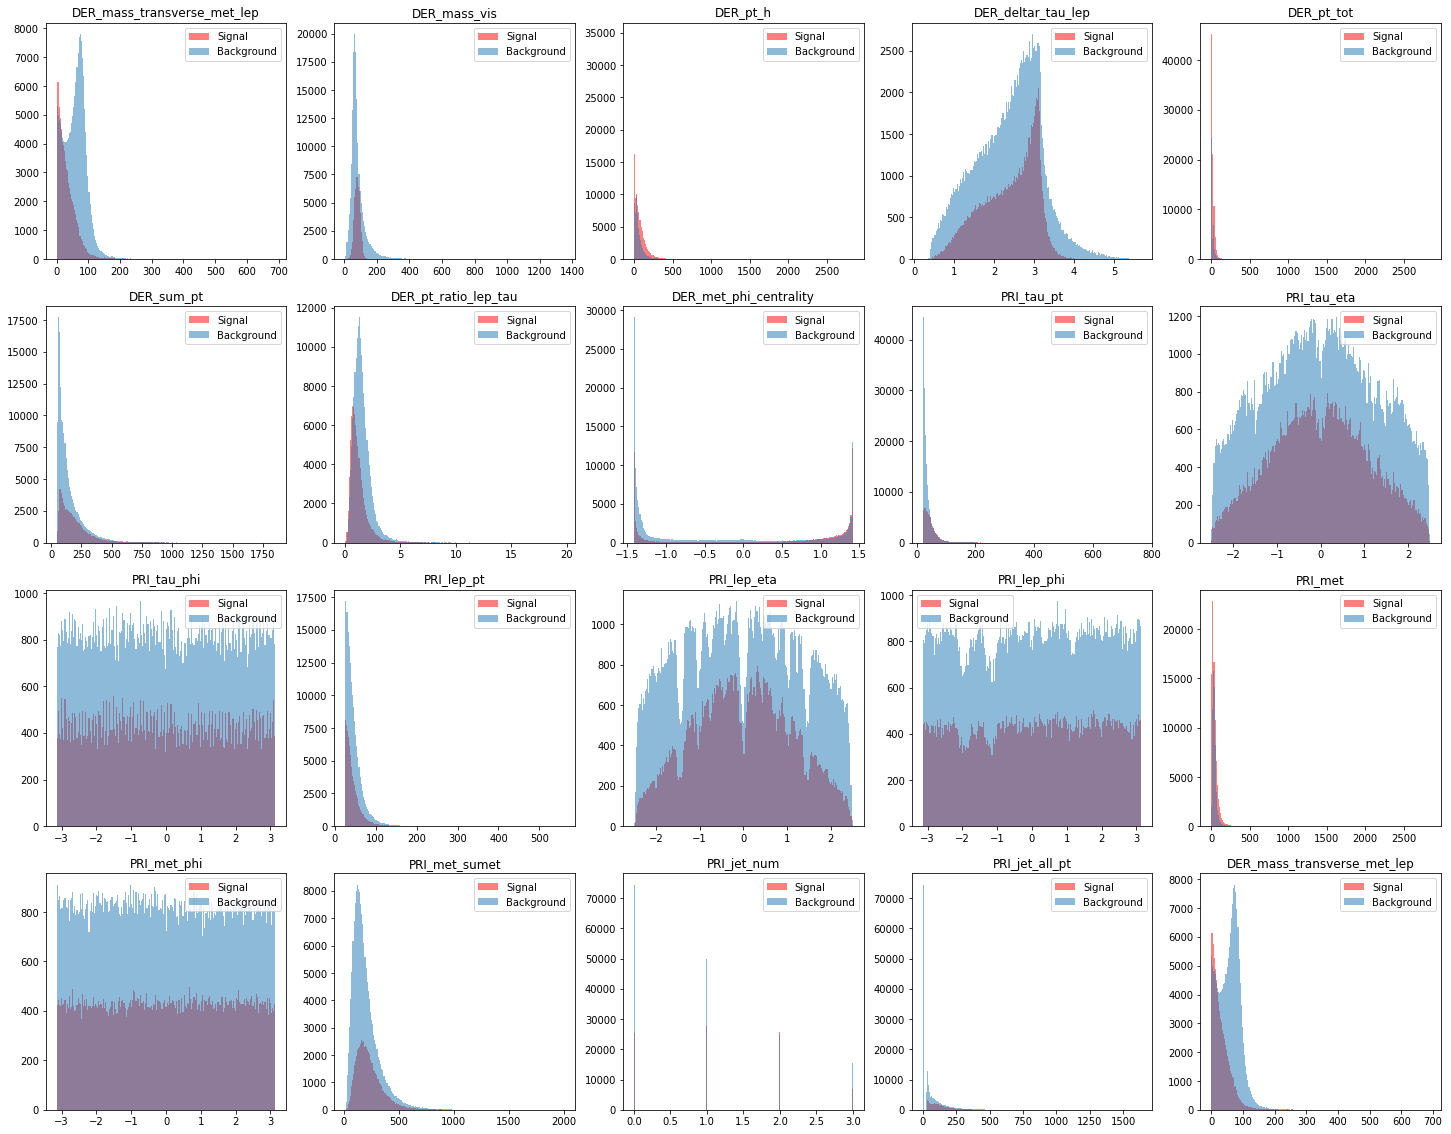

In [422]:
fig, axs = plt.subplots(4, 5, figsize=(25,20))
counter = 0
# We can set the number of bins with the `bins` kwarg
for i in range(4):
    for j in range(5):
        axs[i,j].hist(np.array([x for j,x in enumerate(X_train[:,not_nan_columns[counter][0]]) if (y_train[j] == 1)]), 
                      bins=200, alpha=0.5, color='red', label='Signal')
        axs[i,j].hist(np.array([x for j,x in enumerate(X_train[:,not_nan_columns[counter][0]]) if (y_train[j] == 0)]), 
                      bins=200, alpha=0.5, label = 'Background')
        axs[i, j].set_title(not_nan_columns[counter][1])
        axs[i,j].legend()
        counter += 1
        counter = counter % 19

## Pearson correlation between features

We add a threshold for the correlation coefficient, we pick the features that have value higher than 0.1. 
We just chose PRI_met_sumet, it has a high correlation with other two features after it. Also we create 4 different classifiers for 4 different PRI_jet_num value.

Finally selected NOT NAN features are
>1 DER_mass_transverse_met_lep 

>3 DER_pt_h

>9 DER_sum_pt

>10 DER_pt_ratio_lep_tau

>11 DER_met_phi_centrality

>13 PRI_tau_pt

>21 PRI_met_sumet

Text(0.5,0,'Correlation Matrix NOT NAN columns')

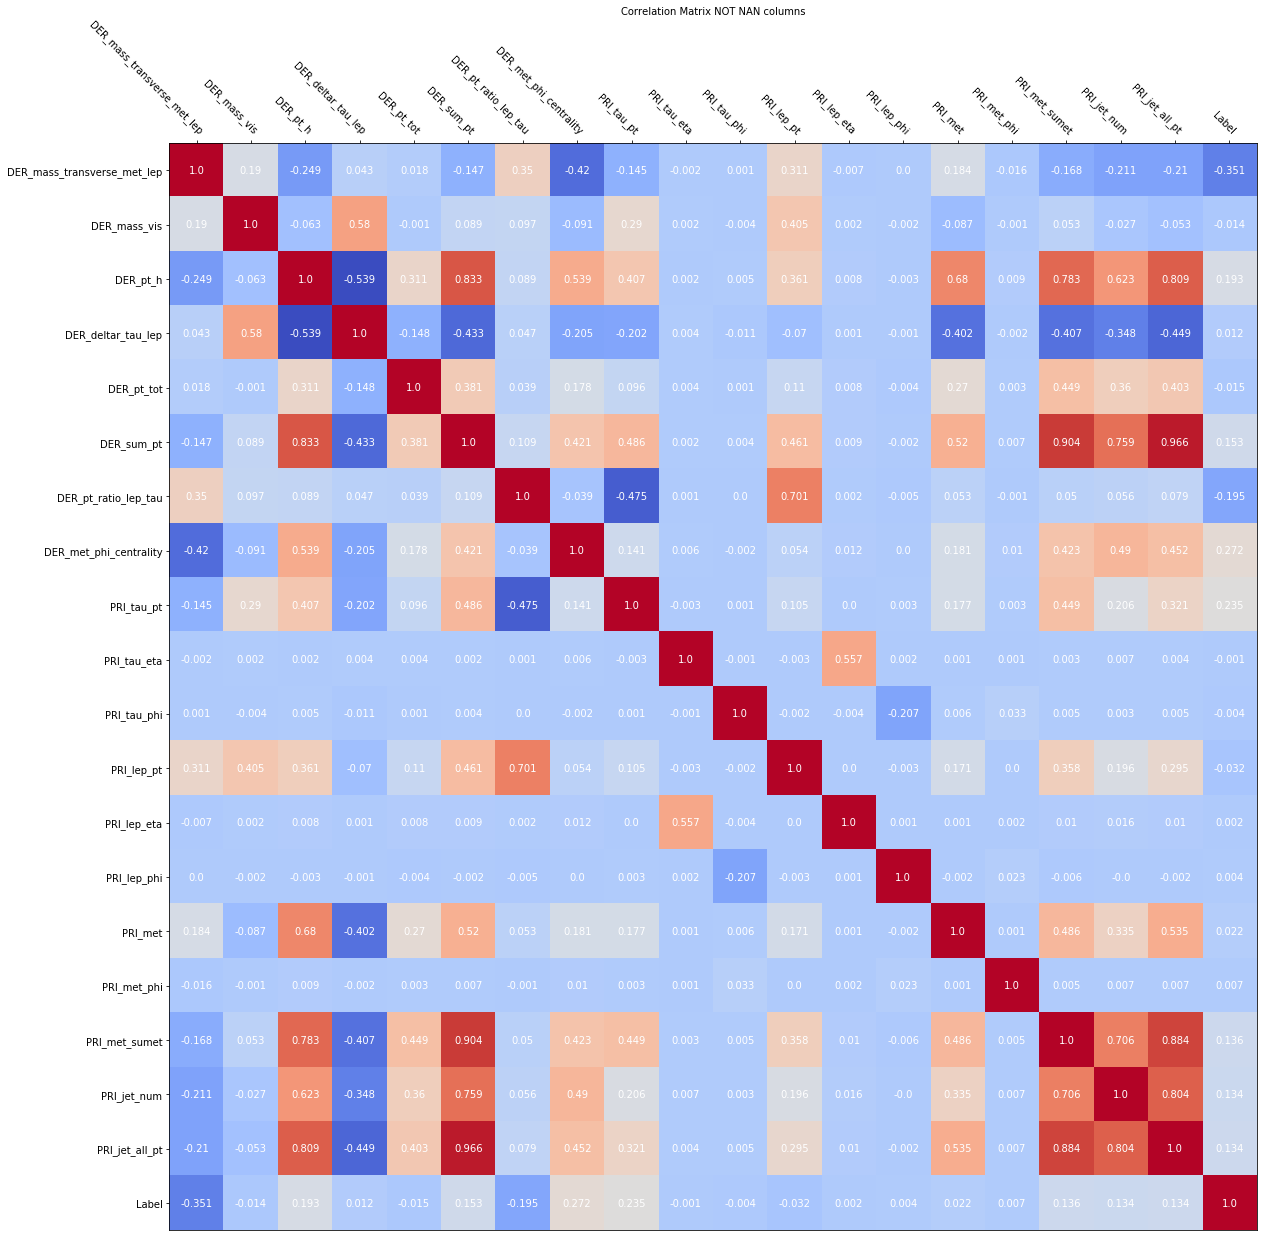

In [424]:
cols = []
col_names = []

for i in not_nan_columns:
    cols.append(X_train[:,i[0]])
    col_names.append(i[1])
    
cols.append(y_train)
    
correlations = np.corrcoef(cols)

fig, ax = plt.subplots(figsize=(20,20))
im = ax.imshow(correlations, cmap=cm.coolwarm)

ax.xaxis.set_label_position('top')

# We want to show all ticks...
ax.set_xticks(np.arange(len(cols)))
ax.set_yticks(np.arange(len(cols)))
# ... and label them with the respective list entries
ax.set_xticklabels(np.append(col_names, 'Label'))
ax.set_yticklabels(np.append(col_names,'Label'))

# Let the horizontal axes labeling appear on top.
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=-45, ha="right",rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cols)):
    for j in range(len(cols)):
        text = ax.text(j, i, np.around(correlations[i, j],3),
                       ha="center", va="center", color="w")

ax.set_xlabel("Correlation Matrix NOT NAN columns")

Let's see the correlation matrix of the features that have invalid values excluding -999.

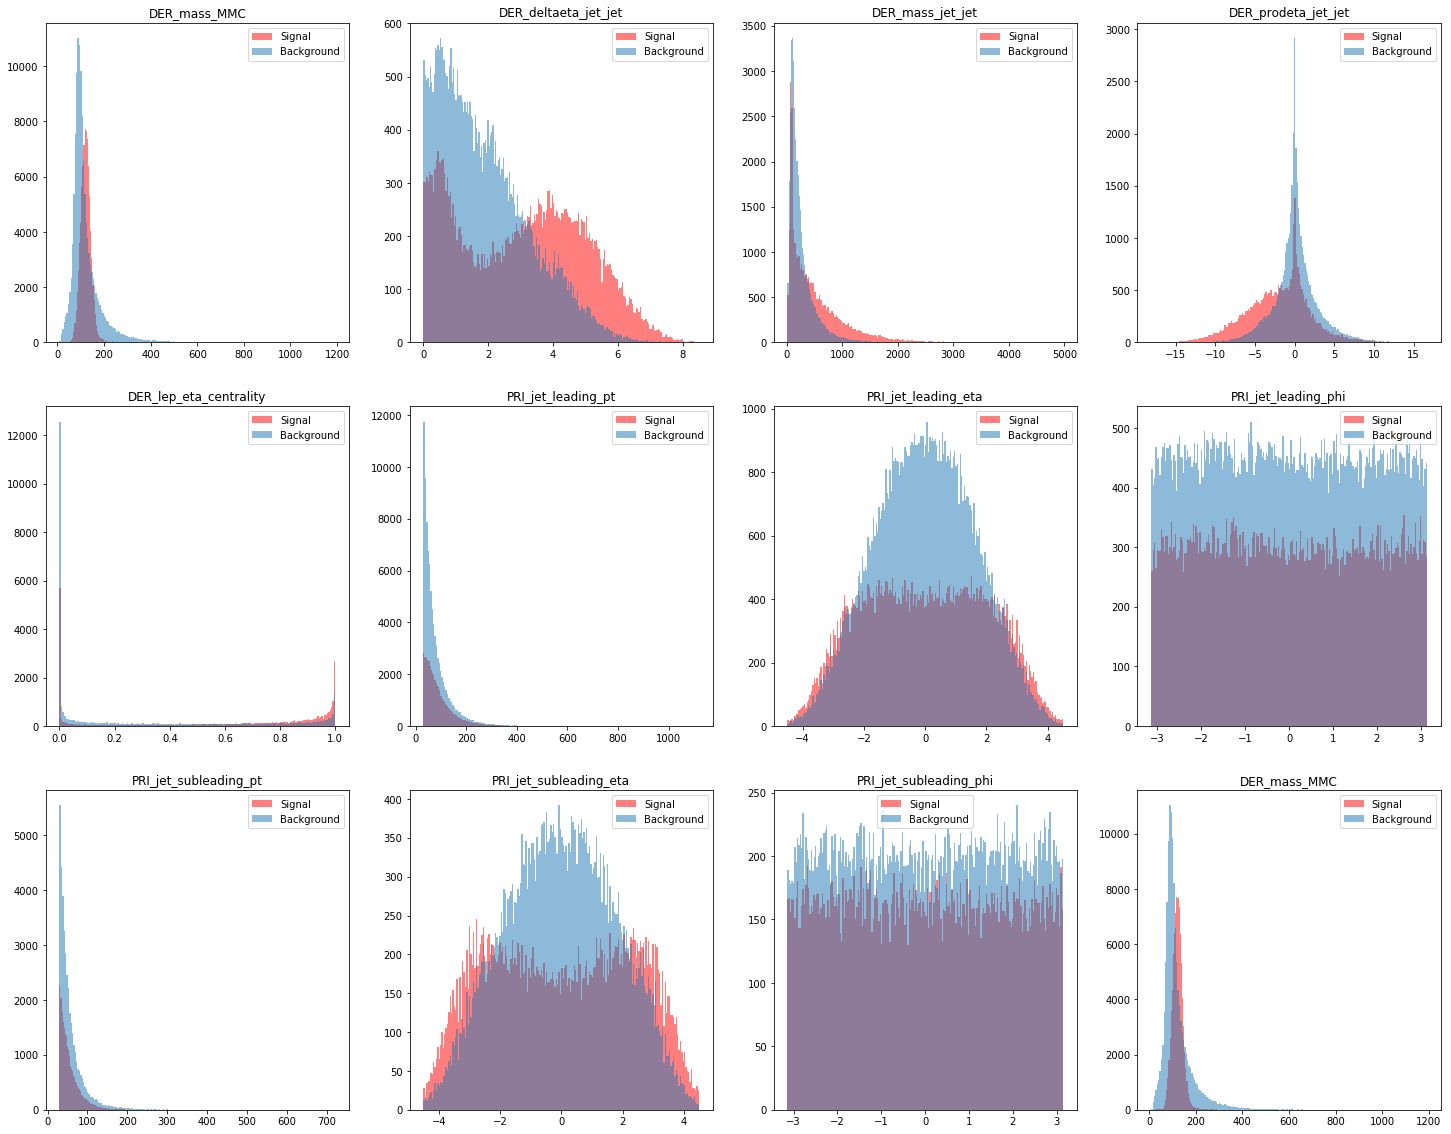

In [425]:
fig, axs = plt.subplots(3, 4, figsize=(25,20))
counter = 0
# We can set the number of bins with the `bins` kwarg
for i in range(3):
    for j in range(4):
        axs[i,j].hist(np.array([x for j,x in enumerate(X_train[:,nan_columns[counter][0]]) if (y_train[j] == 1) and x != -999 ]), 
                      bins=200, alpha=0.5, color='red', label='Signal')
        axs[i,j].hist(np.array([x for j,x in enumerate(X_train[:,nan_columns[counter][0]]) if (y_train[j] == 0) and x != -999]), 
                      bins=200, alpha=0.5, label = 'Background')
        axs[i, j].set_title(nan_columns[counter][1])
        axs[i,j].legend()
        counter += 1
        counter = counter % 11

Text(0.5,0,'Correlation Matrix 177k -999 features excluding -999')

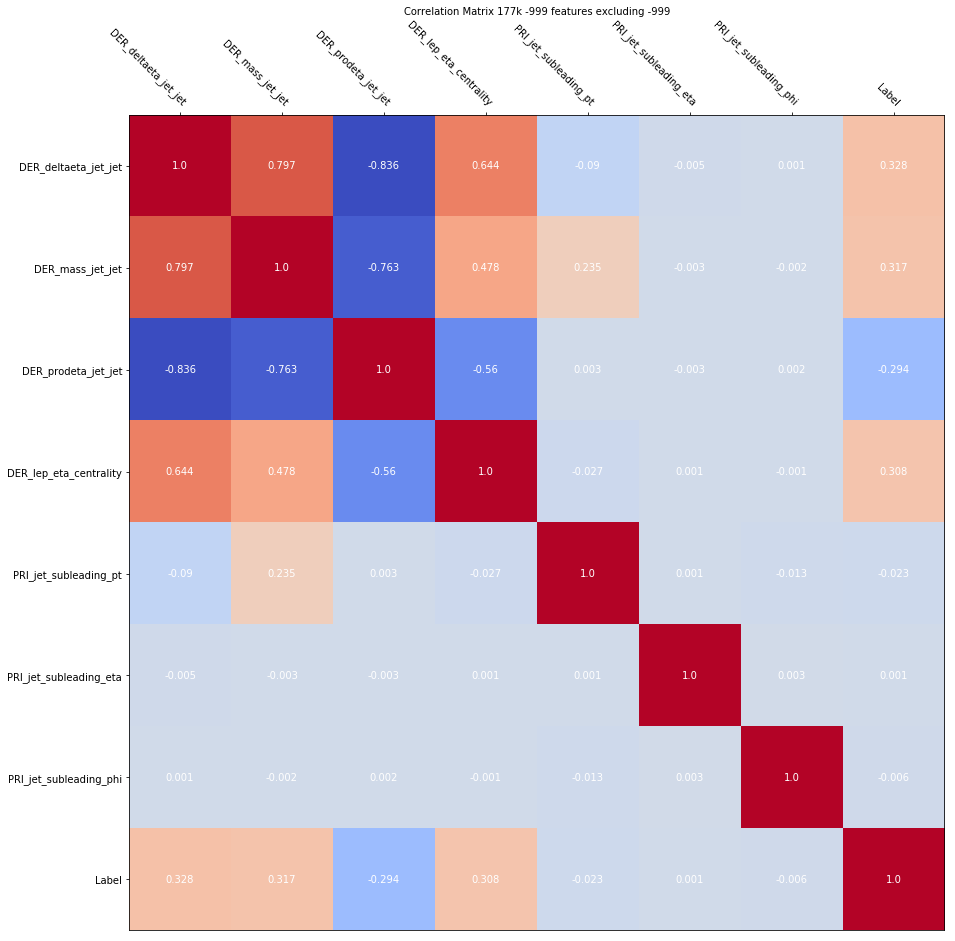

In [427]:
cols = []
col_names = []

for i in [4,5,6,12,26,27,28]:
    cols.append([x for j,x in enumerate(X_train[:,i]) if x != -999])
    col_names.append(columns[i])
    
cols.append(y_train[X_train[:,4] != -999])
    
correlations = np.corrcoef(cols)

fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(correlations, cmap=cm.coolwarm)

ax.xaxis.set_label_position('top')

# We want to show all ticks...
ax.set_xticks(np.arange(len(cols)))
ax.set_yticks(np.arange(len(cols)))
# ... and label them with the respective list entries
ax.set_xticklabels(np.append(col_names, 'Label'))
ax.set_yticklabels(np.append(col_names,'Label'))

# Let the horizontal axes labeling appear on top.
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=-45, ha="right",rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cols)):
    for j in range(len(cols)):
        text = ax.text(j, i, np.around(correlations[i, j],3),
                       ha="center", va="center", color="w")

ax.set_xlabel("Correlation Matrix 177k -999 features excluding -999")

Text(0.5,0,'Correlation Matrix 100k -999 features excluding -999')

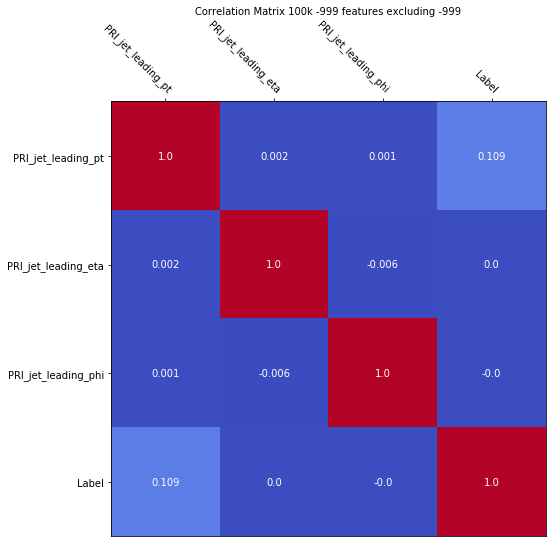

In [428]:
cols = []
col_names = []

for i in [23,24,25]:
    cols.append([x for j,x in enumerate(X_train[:,i]) if x != -999])
    col_names.append(columns[i])
    
cols.append(y_train[X_train[:,23] != -999])
    
correlations = np.corrcoef(cols)

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(correlations, cmap=cm.coolwarm)

ax.xaxis.set_label_position('top')

# We want to show all ticks...
ax.set_xticks(np.arange(len(cols)))
ax.set_yticks(np.arange(len(cols)))
# ... and label them with the respective list entries
ax.set_xticklabels(np.append(col_names, 'Label'))
ax.set_yticklabels(np.append(col_names,'Label'))

# Let the horizontal axes labeling appear on top.
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=-45, ha="right",rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cols)):
    for j in range(len(cols)):
        text = ax.text(j, i, np.around(correlations[i, j],3),
                       ha="center", va="center", color="w")

ax.set_xlabel("Correlation Matrix 100k -999 features excluding -999")

## Correlation between PRI_jet_num with features that have meaningless values

* PRI_jet_num = 0

> DER_deltaeta_jet_jet = -999

> DER_mass_jet_jet = -999

> DER_prodeta_jet_jet = -999

> DER_lep_eta_centrality = -999

> PRI_jet_leading_* = -999

> PRI_jet_subleading_* = -999

* PRI_jet_num = 1

> DER_deltaeta_jet_jet = -999

> DER_mass_jet_jet = -999

> DER_prodeta_jet_jet = -999

> DER_lep_eta_centrality = -999

> PRI_jet_subleading_* = -999


#### Training Set 1 - PRI_jet_num = 0

> REMOVE PRI_jet_num

> REMOVE DER_deltaeta_jet_jet = -999

> REMOVE DER_mass_jet_jet = -999

> REMOVE DER_prodeta_jet_jet = -999

> REMOVE DER_lep_eta_centrality = -999

> REMOVE PRI_jet_leading_* = -999

> REMOVE PRI_jet_subleading_* = -999

#### Training Set 2 - PRI_jet_num = 1

> REMOVE PRI_jet_num

> REMOVE DER_deltaeta_jet_jet = -999

> REMOVE DER_mass_jet_jet = -999

> REMOVE DER_prodeta_jet_jet = -999

> REMOVE DER_lep_eta_centrality = -999

> REMOVE PRI_jet_subleading_* = -999

#### Training Set 3 - PRI_jet_num = 2, 3

> REMOVE PRI_jet_num

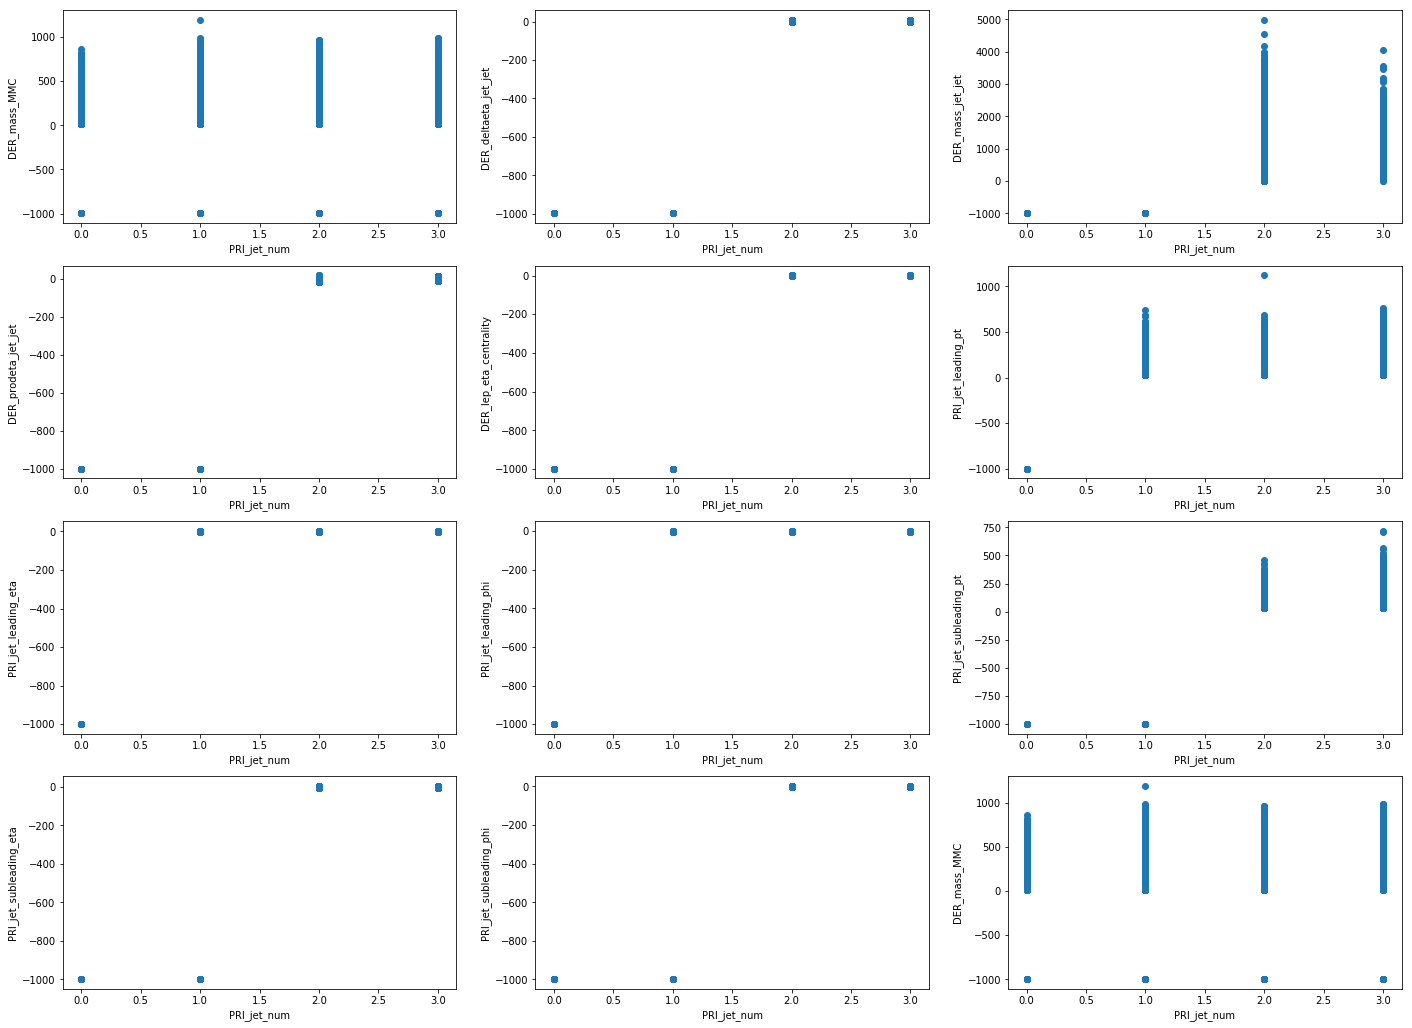

In [429]:
fig, axs = plt.subplots(4, 3, figsize=(24,18))
columns_170k = [0,4,5,6,12,23,24,25,26,27,28,0]
counter = 0
# We can set the number of bins with the `bins` kwarg
for i in range(4):
    for j in range(3):
        axs[i, j].scatter(X_train[:,22], X_train[:,columns_170k[counter]])
        axs[i, j].set_ylabel(columns[columns_170k[counter]])
        axs[i, j].set_xlabel(columns[22])
        #axs[i,j].legend()
        counter += 1

# Feature Selection, Transformation, Normalization, Imputation

## 1. Feature Selection

Use these features that do not have meaningless values (High correlation with Label): 12 features

- 1 DER_mass_transverse_met_lep 
- 3 DER_pt_h
- 9 DER_sum_pt
- 10 DER_pt_ratio_lep_tau
- 11 DER_met_phi_centrality
- 13 PRI_tau_pt
- 21 PRI_met_sumet

Choose features that have meaningless values:

- 0 - DER_mass_MMC
- 4 - DER_deltaeta_jet_jet
- 5 - DER_mass_jet_jet 
- 6 - DER_prodeta_jet_jet
- 12 - DER_lep_eta_centrality
- 23 - PRI_jet_leading_pt

In [430]:
selected_features = np.array([1,3,9,10,11,13,21,22,23])
selected_features = np.sort(np.append(selected_features, [0,4,5,6,12]))
print(selected_features)

[ 0  1  3  4  5  6  9 10 11 12 13 21 22 23]


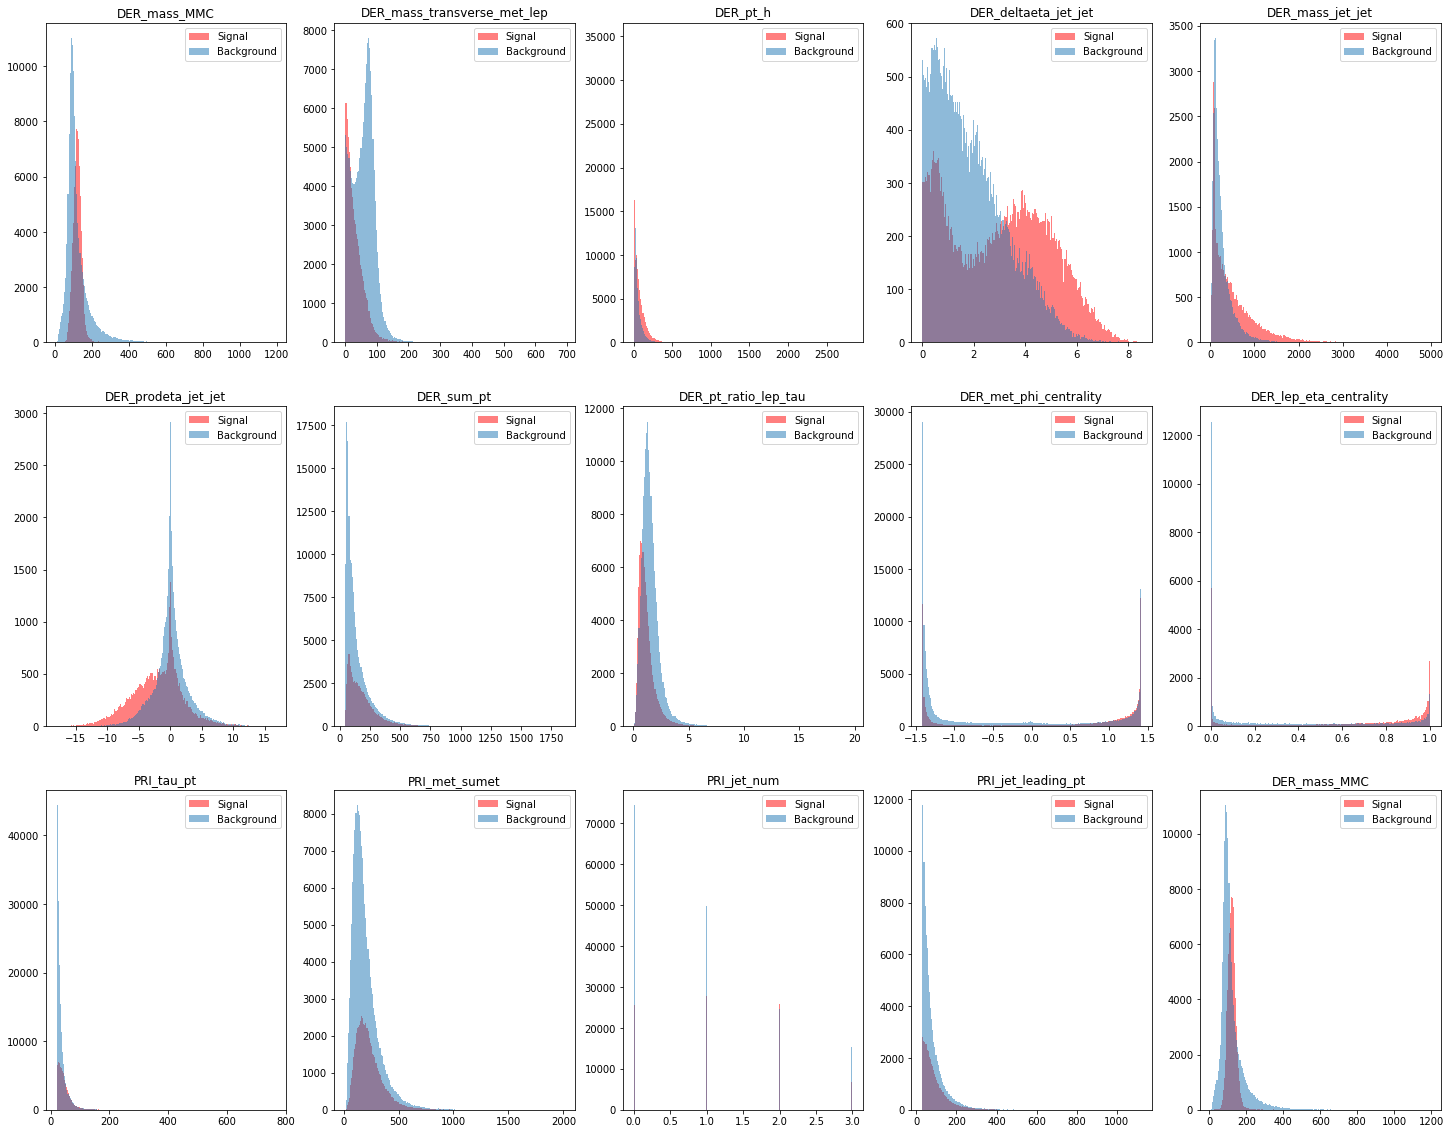

In [431]:
fig, axs = plt.subplots(3, 5, figsize=(25,20))
counter = 0
# We can set the number of bins with the `bins` kwarg
for i in range(3):
    for j in range(5):
        axs[i,j].hist(np.array([x for j,x in enumerate(X_train[:,selected_features[counter]]) if (y_train[j] == 1) and x != -999 ]), 
                      bins=200, alpha=0.5, color='red', label='Signal')
        axs[i,j].hist(np.array([x for j,x in enumerate(X_train[:,selected_features[counter]]) if (y_train[j] == 0) and x != -999]), 
                      bins=200, alpha=0.5, label = 'Background')
        axs[i, j].set_title(columns[selected_features[counter]])
        axs[i,j].legend()
        counter += 1
        counter = counter % 14

## 2. Data Transformation

Some features are log-transformed to obtain some normality.

In [432]:
selected_features

array([ 0,  1,  3,  4,  5,  6,  9, 10, 11, 12, 13, 21, 22, 23])

In [433]:
log_transformed_columns = [3,9,10,13,21]

for i in log_transformed_columns:
    X_train[np.where(X_train[:,i] != -999), i] = np.log(X_train[np.where(X_train[:,i] != -999),i] + 1)
    X_train[np.where(X_train[:,i] == -999)] = -999

X_train.shape

(250000, 30)

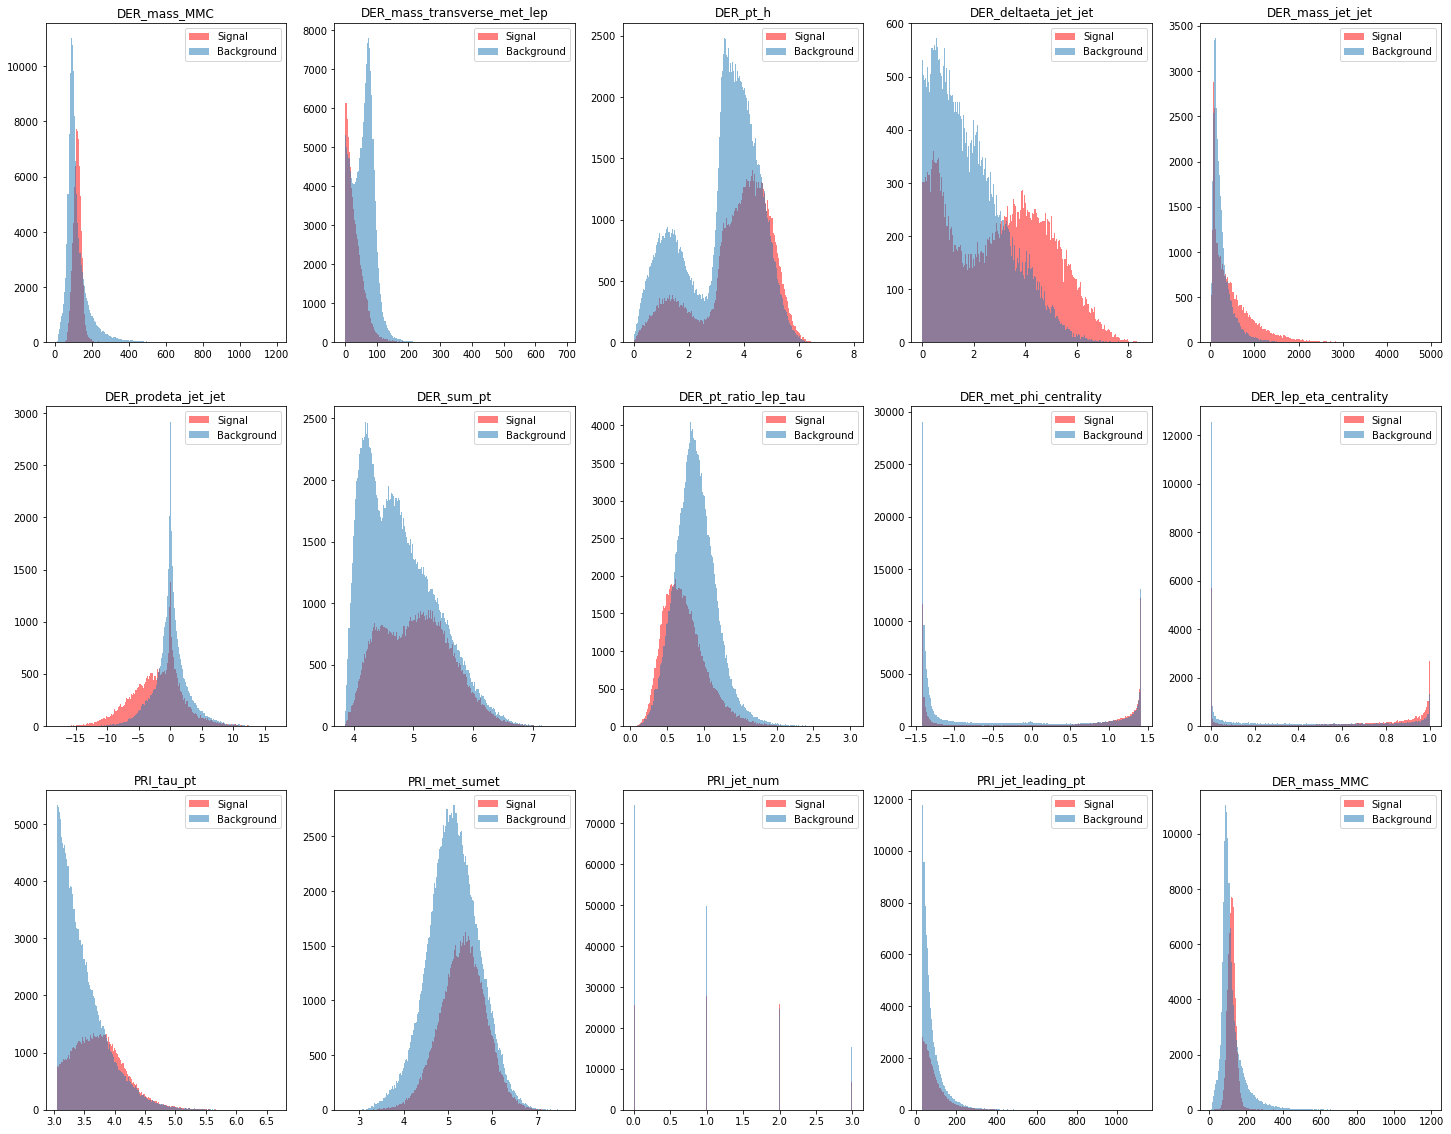

In [434]:
fig, axs = plt.subplots(3, 5, figsize=(25,20))
counter = 0
# We can set the number of bins with the `bins` kwarg
for i in range(3):
    for j in range(5):
        axs[i,j].hist(np.array([x for j,x in enumerate(X_train[:,selected_features[counter]]) if (y_train[j] == 1) and x != -999 ]), 
                      bins=200, alpha=0.5, color='red', label='Signal')
        axs[i,j].hist(np.array([x for j,x in enumerate(X_train[:,selected_features[counter]]) if (y_train[j] == 0) and x != -999]), 
                      bins=200, alpha=0.5, label = 'Background')
        axs[i, j].set_title(columns[selected_features[counter]])
        axs[i,j].legend()
        counter += 1
        counter = counter % 14

In [435]:
X_train = X_train[:, selected_features]
X_train.shape

(250000, 14)

In [436]:
np.save("X_train_not_normalized", X_train)

# Choose one of them below !

## 3. Data Standartization

Standartization applied to data.

In [382]:
for i in [x for x in range(X_train.shape[1]) if x != 12]:
    col_val = X_train[np.where(X_train[:,i] != -999), i]
    X_train[np.where(X_train[:,i] != -999), i] = (col_val - np.mean(col_val)) / (np.std(col_val)) 
    
print(X_train.shape)
print(X_train.min())
print(X_train.max())

(250000, 14)
-999.0
18.677215103797174


## 3. Data Normalization

Normalization applied to data for Logistic Regression models except for the PRI_jet_num columns, so max is 3.0.

In [410]:
for i in [x for x in range(X_train.shape[1]) if x != 12]:
    col_val = X_train[np.where(X_train[:,i] != -999), i]
    X_train[np.where(X_train[:,i] != -999), i] = (col_val - np.min(col_val)) / (np.max(col_val) - np.min(col_val))
    
print(X_train.shape)
print(X_train.min())
print(X_train.max())

(250000, 14)
-999.0
3.0


## 4. Data Imputation

We impute DER_mass_MMC with median value

In [411]:
X_train[np.where(X_train[:,0] == -999), 0] = np.median(X_train[np.where(X_train[:,0] != -999), 0])
sum(X_train[:,0] == -999)

0

In [ ]:
np.save("X_train_normalized", X_train)

# Final Features

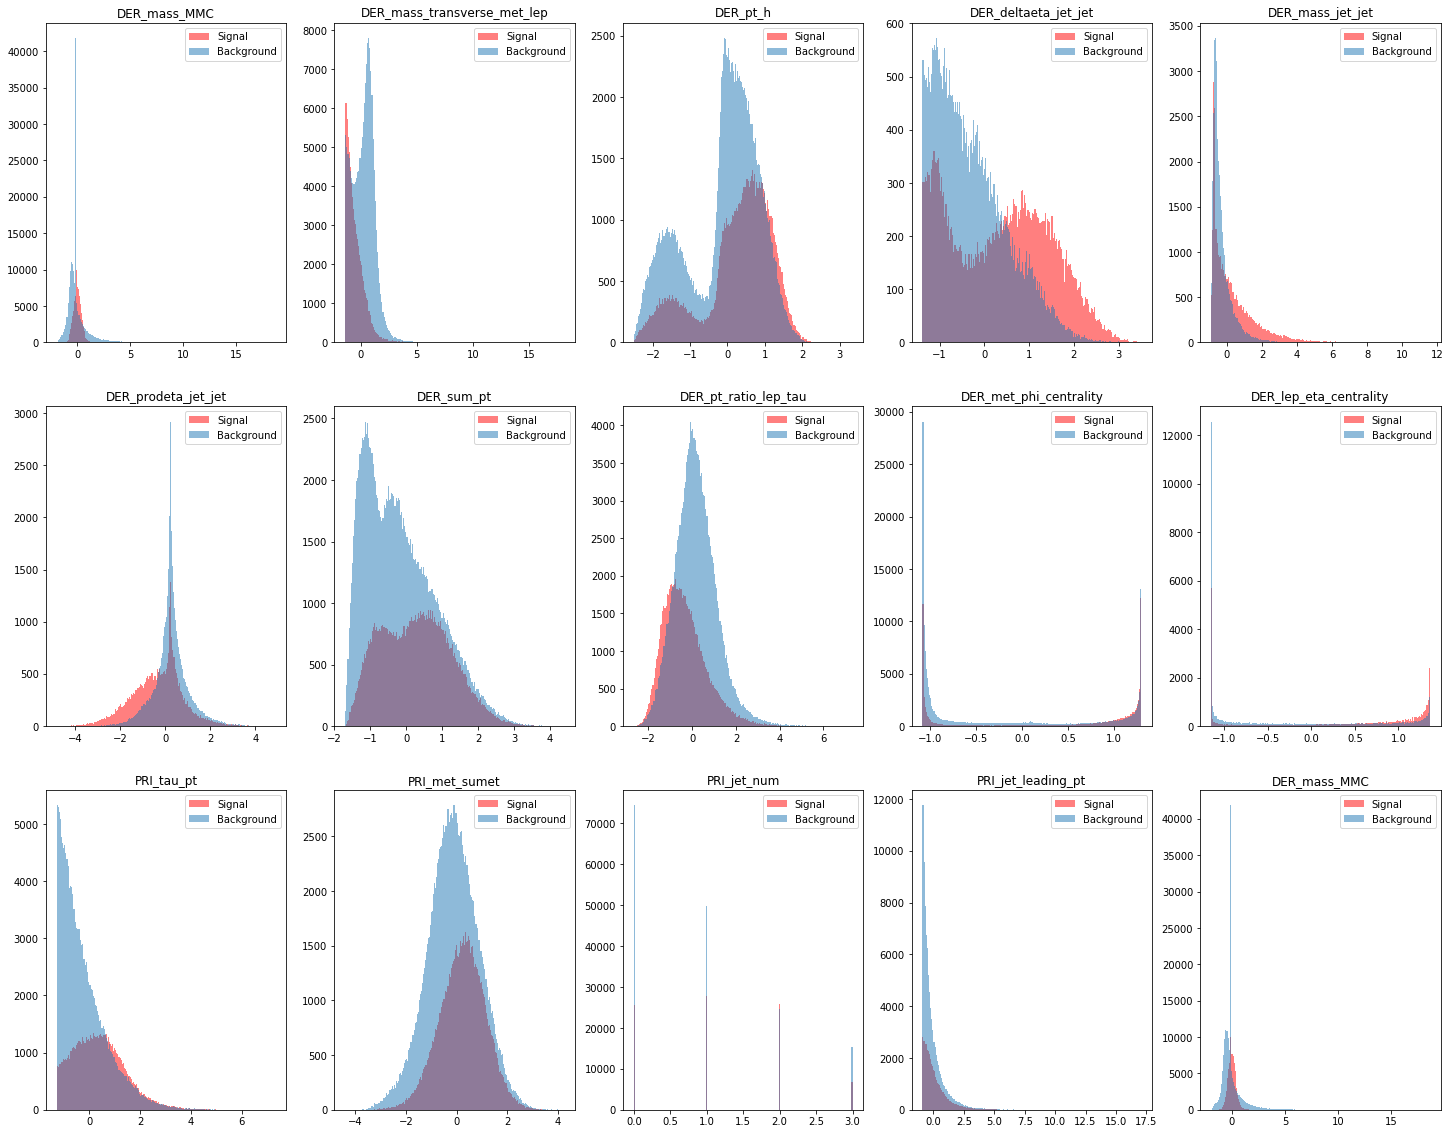

In [384]:
fig, axs = plt.subplots(3, 5, figsize=(25,20))
counter = 0
# We can set the number of bins with the `bins` kwarg
for i in range(3):
    for j in range(5):
        axs[i,j].hist(np.array([x for j,x in enumerate(X_train[:,counter]) if (y_train[j] == 1) and x != -999]), 
                      bins=200, alpha=0.5, color='red', label='Signal')
        axs[i,j].hist(np.array([x for j,x in enumerate(X_train[:,counter]) if (y_train[j] == 0) and x != -999]), 
                      bins=200, alpha=0.5, label = 'Background')
        axs[i, j].set_title(columns[selected_features[counter]])
        axs[i,j].legend()
        counter += 1
        counter = counter % 14

In [385]:
train_y = y_train.copy()
y_train[y_train == 0] = -1

In [386]:
np.save("X_train", X_train)
np.save("y_train_10", train_y)
np.save("y_train_1-1", y_train)